***Emotion Analysis Detection using Deep Learning.***

**Project Collaborators:**

Shobhit Mudkhedkar - 19070122112

Shubhankar Haldia - 19070122166

Siddhesh Shankar - 19070122168 

## Architecture of the Project:

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
img = cv2.imread("/content/drive/MyDrive/NLP Project/NLP ARCHITECTURE PIPELINE-Restructured.jpg")

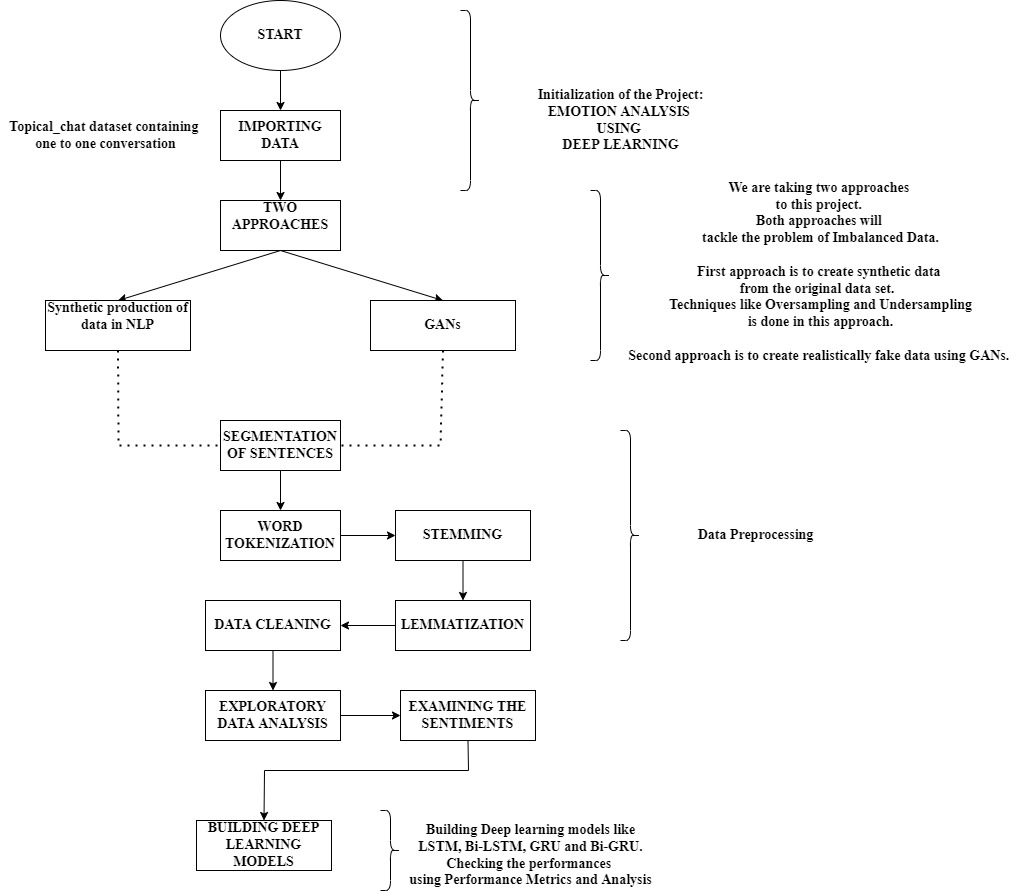

In [ ]:
cv2_imshow(img)

## Importing the Data set and all the useful libraries and modules:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
import tensorflow as tf

import pathlib
import shutil
import tempfile

!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_hub as hub
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

Version:  2.8.0
Hub version:  0.12.0
GPU is available


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [ ]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 133 kB 7.1 MB/s 


In [ ]:
!nvidia-smi

Sat Apr 30 08:05:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP Project/topical_chat.csv")
df.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


In [ ]:
df["sentiment"].value_counts()

 Curious to dive deeper    80888
 Neutral                   41367
 Surprised                 30638
 Happy                     29617
 Sad                        2533
 Disgusted                  1433
 Fearful                    1026
 Angry                       876
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


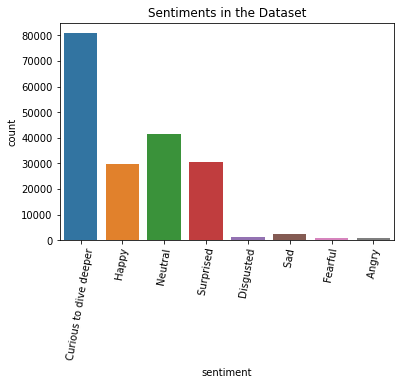

In [ ]:
plt.title("Sentiments in the Dataset")
sns.countplot("sentiment", data = df)
plt.xticks(rotation = 80)
plt.show()

We can see that we have a dataset which contains a column called as Sentiments. We have many sentiments like "Happy", "Natural", "Surprised", "Disgusted" etc. But we can see that there are many conversations which are labelled as "Curious to Dive Deeper".

We need to go further and investigate it more.

We hence performed both Oversampling and Undersampling:

## Oversampling of the imbalanced data set with SMOTE:

In [ ]:
df.values

array([[1, ' Are you a fan of Google or Microsoft?',
        ' Curious to dive deeper'],
       [1,
        ' Both are excellent technology they are helpful in many ways. For the security purpose both are super.',
        ' Curious to dive deeper'],
       [1,
        " I'm not  a huge fan of Google, but I use it a lot because I have to. I think they are a monopoly in some sense. ",
        ' Curious to dive deeper'],
       ...,
       [8628,
        " I don't think I have either. That's an insane amount of episodes. Did you ever see Thomas the Tank Engine?",
        ' Curious to dive deeper'],
       [8628,
        ' I did, my little brother used to love Thomas the Tank Engine, I remember it had great narrators.',
        ' Happy'],
       [8628,
        ' It did. Ringo Starr, George Carlin, and Alec Baldwin have all narrated for them.',
        ' Neutral']], dtype=object)

In [ ]:
data = df.values

In [ ]:
# Split into input and output elements:
X,y = data[:,1], data[:,-1]

In [ ]:
# Label encode the target variable:
y = LabelEncoder().fit_transform(y)

Class=1, n=80888 (42.939%)
Class=4, n=29617 (15.722%)
Class=5, n=41367 (21.960%)
Class=7, n=30638 (16.264%)
Class=2, n=1433 (0.761%)
Class=6, n=2533 (1.345%)
Class=3, n=1026 (0.545%)
Class=0, n=876 (0.465%)


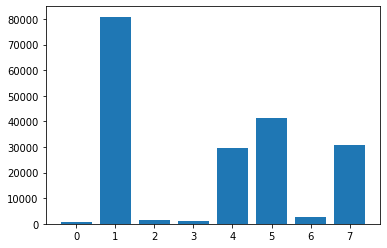

In [ ]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### After Oversampling (SMOTE):

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['message']]
y = df[['sentiment']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40) 

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train.values.ravel())

CountVectorizer()

In [ ]:
X_train=vectorizer.transform(X_train.values.ravel())
X_test=vectorizer.transform(X_test.values.ravel())

In [ ]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [ ]:
X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)
sm =  pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
dfNew = df

In [ ]:
dfNew['messageUpdated'] = X_resampled
dfNew['sentimentUpdated'] = y_resampled 

In [ ]:
# summarize distribution
counter = Counter(y_resampled)
for k,v in counter.items():
	per = v / len(y_resampled) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### Exploratory Data Analysis:

In [ ]:
from nltk.corpus import stopwords # Also, for the data preprocessing
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

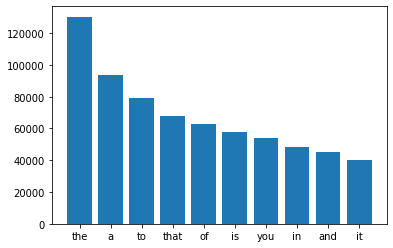

In [ ]:
# Firstly we create a corpus:
corpus = []
def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    from collections import defaultdict
    dedict = defaultdict(int)
    for word in corpus:
        if word in stop:
            dedict[word]+=1
    top = sorted(dedict.items(), key = lambda x:x[1], reverse = True)[:10]
    x,y = zip(*top)
    plt.bar(x,y)


plot_top_stopwords_barchart(df['message'])

We have created a plot for checking the most frequently used stopwords, here we can see that "the" is the most commonly used stopword here in the corpus we created.

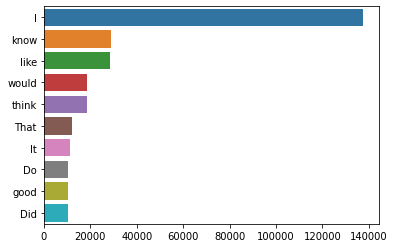

In [ ]:
# Before going into preprocessing, we should check the most frequent words:
# We will check those words which aren't stopwords and are frequent too.
from collections import  Counter
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df['message'])

Now we have plotted the most frequently used non-stop words. The word "I" is the most frequently.

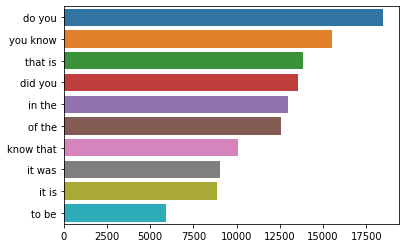

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(df['message'],2)[:10]

x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)
plt.show()

Here we have plotted the most frequent pair of words i.e. Bigrams, we can see that "do you" is used most frequently. We can expect this because this data set contains one to on conversations.

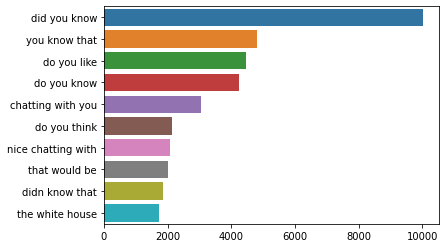

In [ ]:
top_tri_grams=get_top_ngram(df['message'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.show()

Here we have plotted the most frequent 3 words that are used together, we can see that **"did you know"** is used most frequently.

In [ ]:
corpus

[]

### Data Preprocessing:

In [ ]:
df.isna().sum()

conversation_id    0
message            0
sentiment          0
dtype: int64

In [ ]:
df.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


In [ ]:
df1 = df.copy()

In [ ]:
df1['sentiment'] = df1['sentiment'].astype('category')

In [ ]:
df1.dtypes

conversation_id       int64
message              object
sentiment          category
dtype: object

In [ ]:
df1['Label'] = df1['sentiment'].cat.codes

label = {'sentiment':{'Curious to dive deeper' : 1, 'Happy':2, 'Neutral':3 , 'Suprised':4,'Disgusted':5,'Sad':6, 'Fearful':7, 'Angry':8}}

In [ ]:
df1['Label'].value_counts()

1    80888
5    41367
7    30638
4    29617
6     2533
2     1433
3     1026
0      876
Name: Label, dtype: int64

In [ ]:
df1.head()

,conversation_id,message,sentiment,Label
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper,1
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper,1
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper,1
3,1,Google provides online related services and p...,Curious to dive deeper,1
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper,1


In [ ]:
print("The original shape: ",df.shape)
df1.drop_duplicates(inplace=True)
print("After droping duplicates:",df1.shape)

The original shape:  (188378, 3)
After droping duplicates: (188348, 4)


In [ ]:
# Get Independent Features:
X = df1.drop('Label', axis = 1)
# Get Dependent Features: 
y = df1['Label']

In [ ]:
print(X.shape)
print("----"*3)
print(y.shape)

(188348, 3)
------------
(188348,)


In [ ]:
# One hot Encoding:
Messages = X.copy()
Messages.reset_index(inplace = True)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
ls = LancasterStemmer()
wordNet = WordNetLemmatizer()

In [ ]:
corpus = []
for i in range(len(Messages)):
  record = re.sub("[^a-zA-Z]"," ",Messages['message'][i])
  record = record.lower()
  record = record.split()
  record = [wordNet.lemmatize(word) for word in record if not word in stopwords.words('english')]
  record = ' '.join(record)
  corpus.append(record)

### Feature Extraction with Oversampled Dataset:

#### Splitting the dataset into training and validation datasets:

In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df["message"], df["sentiment"])

train_labels = train_y
valid_labels = valid_y

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

#### Bag of words on Oversampled Dataset:

So, Bag of Words or BOW contains all the words with its specific frequency in the sentences. 
For example: 

Sent 1 --> Good boy

Sent 2 --> Good girl

Sent 3 --> Good boy girl

So, here the Bag of Words table also called as frequency table will be like this: 

        f1    f2    f3
       good   boy   girl
    S1   1     0     0

    S2   1     0     1

    S3   1     1     1

In [ ]:
# Count Vectors as features
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer="word", token_pattern=r"\w{1,}")
count_vect.fit(df["message"])

# transform the training and validation data using count vectorizer object
xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)

#### TF*IDF Vectorization:

TF stands for Term Frequency and IDF stands for Inverse Document Frequency.

Both are used together to form TF IDF Frequency table Vectorizer Method.

Term Frquency =

(number of Repeations of words in a sentences) / (number of words in a sentences)

Inverse Document Frequency =

log(Number of Sentences / Number of Sentences containing the words)

Both together are used in this way:

TF*IDF

There are different types of TF IDF vectorization:

1] Word Level TF-IDF: Here we are representing the TF IDF Scores/Vectors of every word in a matrix representation.

2] N-Gram Level TF IDF: N-Terms together i.e. N-Grams. Here also, the TF IDF scores/vectors of N-Grams will be representated in a matrix representation.

3] Character Level TF IDF: Matrix Representation of TF IDF Scores/vectors of N-Grams in a corpus.

##### Word-Level TF-IDF:

In [ ]:
# Matrix Representing tf-idf scores of eveery term in different documents
tfidf_vect = TfidfVectorizer(analyzer="word", token_pattern=r"\w{1,}", max_features=5000)
tfidf_vect.fit(df["message"])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

##### N-Gram TF-IDF:

In [ ]:
# N-Grams are the combination of N terms together. This matrix representing tf-idf scores of N-Grams
tfidf_vect_ngram = TfidfVectorizer(analyzer="word", token_pattern=r"\w{1,}", ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df["message"])
xtrain_tfidf_ngram = tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram = tfidf_vect_ngram.transform(valid_x)

##### Characters Level TF-IDF:

In [ ]:
# Matrix representing tf-idf scores of character level n-grams in the corpus
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer="char", token_pattern=r"\w{1,}", ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df["message"])
xtrain_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(valid_x) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  "The parameter 'token_pattern' will not be used"


##### Hashing Vectorizer:

In [ ]:
# This method is used to convert a collection of text documents to a matrix of token occurences
hash_vectorizer = HashingVectorizer(n_features=5000)
hash_vectorizer.fit(df["message"])
xtrain_hash_vectorizer = hash_vectorizer.transform(train_x) 
xvalid_hash_vectorizer = hash_vectorizer.transform(valid_x)

### Deep Learning Model Building with oversampled dataset:

In [ ]:
from tensorflow.keras.layers import Embedding
from sklearn.metrics import accuracy_score
from keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, CuDNNGRU

In [ ]:
# Vocabulary Size:
voc_size = 5000

In [ ]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[1621, 1183, 4792],
 [1664, 143, 4470, 2218, 1130, 1186, 1043, 721],
 [4258, 1621, 1183, 429, 226, 249, 2937, 3002],
 [1183, 3223, 2262, 2605, 1715, 4547, 978, 2262, 4914, 572, 4165, 2248, 1725],
 [804, 1715, 245, 1621, 956, 3212, 2341],
 [1183, 789, 495, 2009, 4130, 2063, 2787, 495, 4844, 2821],
 [4055, 1183, 16, 4464, 3321, 3751, 3536, 3365],
 [4303, 1183, 4502, 4064, 4664, 4322, 3811, 4664, 1183, 514, 226, 2502, 2470],
 [2455, 1183, 4064, 429, 2848, 1154],
 [3977, 1183, 1567, 572, 4165, 1183, 1715, 4225, 4048, 2886, 2197, 4156, 3972],
 [1130, 2455, 1784],
 [3977,
  2579,
  480,
  1927,
  3226,
  4526,
  3943,
  681,
  4658,
  1113,
  3343,
  1784,
  1567,
  4934,
  2182,
  627],
 [4055, 2533, 1784, 3991],
 [3768,
  1784,
  1753,
  681,
  2742,
  2894,
  1280,
  46,
  1784,
  1753,
  681,
  3863,
  1414,
  257,
  3077,
  1370],
 [4303, 4839, 3178, 4055, 3186, 2881],
 [3977,
  1784,
  4761,
  2020,
  3077,
  3824,
  38,
  1175,
  2164,
  1784,
  1295,
  1784,
  3531,
  1386],
 [1342,

In [ ]:
## Embedding Representation:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ... 1621 1183 4792]
 [   0    0    0 ... 1186 1043  721]
 [   0    0    0 ...  249 2937 3002]
 ...
 [   0    0    0 ... 2520 1853 4165]
 [   0    0    0 ...  936 4523 1268]
 [   0    0    0 ... 2538  392 4517]]


In [ ]:
embedded_docs.shape

(188348, 20)

In [ ]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final,y_final, test_size = 0.1, random_state=42 )

##### LSTM, Bi-LSTM, GRU, Bi-GRU:

RNN or Recurrent Neural Networks sufffer from Short term Memory.So, if we are trying to process a paragraph of text to do predictions, RNN’s may leave out important information from the beginning.

During back propogation, RNNs may suffer vanishing gradient. The vanishing gradient problem is when the gradient shrinks as it back propagates through time. If a gradient value becomes extremely small, it doesn’t contribute too much learning.

What are LSTM and GRU?

LSTM is Long Short Term Memory.

GRU is Gated Recurrent Unit.

In [ ]:
embedding_vector_features = 200 
def train_and_evaluate_model(model_name, X_test, trainable=False):
  if(model_name == 'LSTM'):
    #hub_layer = hub.kerasLayer(model_name, dtype=tf.string,  trainable=trainable)
    model = Sequential()
    model.add(Embedding(voc_size,embedding_vector_features, input_length = sent_length))
    model.add(Dropout(0.3))  
    model.add(CuDNNLSTM(200, return_sequences=True,)) # 60 Neurons
    model.add(CuDNNLSTM(200))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'softmax', kernel_initializer = 'glorot_uniform'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 64,
                        callbacks = [tfdocs.modeling.EpochDots(),
                                     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,
                                                                      mode = 'min'),
                                     tf.keras.callbacks.TensorBoard(logdir/model_name)],
                        verbose = 0)
    #yPred = (model.predict(X_test)).astype('int32')
    y_pred = np.argmax(model.predict(X_test), axis = -1)

  elif(model_name == 'Bi-LSTM'):
    #hub_layer = hub.kerasLayer(model_name, dtype=tf.string,  trainable=trainable)
    model = Sequential()
    model.add(Embedding(voc_size,embedding_vector_features, input_length = sent_length))
    model.add(Dropout(0.3))  
    model.add(Bidirectional(CuDNNLSTM(200, return_sequences=True,))) # 60 Neurons
    model.add(Bidirectional(CuDNNLSTM(200)))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'softmax', kernel_initializer = 'glorot_uniform'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 64,
                        callbacks = [tfdocs.modeling.EpochDots(),
                                     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,
                                                                      mode = 'min'),
                                     tf.keras.callbacks.TensorBoard(logdir/model_name)],
                        verbose = 0)
    #yPred = (model.predict(X_test)).astype('int32')
    y_pred = np.argmax(model.predict(X_test), axis = -1)

  elif(model_name == 'GRU'):
    #hub_layer = hub.kerasLayer(model_name, dtype=tf.string,  trainable=trainable)
    model = Sequential()
    model.add(Embedding(voc_size,embedding_vector_features, input_length = sent_length))
    model.add(Dropout(0.3))  
    model.add(CuDNNGRU(200, return_sequences=True,)) # 60 Neurons
    model.add(CuDNNGRU(200))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'softmax', kernel_initializer = 'glorot_uniform'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 64,
                        callbacks = [tfdocs.modeling.EpochDots(),
                                     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,
                                                                      mode = 'min'),
                                     tf.keras.callbacks.TensorBoard(logdir/model_name)],
                        verbose = 0)
    #yPred = (model.predict(X_test)).astype('int32')
    y_pred = np.argmax(model.predict(X_test), axis = -1)

  elif(model_name == 'Bi-GRU'):
    #hub_layer = hub.kerasLayer(model_name, dtype=tf.string,  trainable=trainable)
    model = Sequential()
    model.add(Embedding(voc_size,embedding_vector_features, input_length = sent_length))
    model.add(Dropout(0.3))  
    model.add(Bidirectional(CuDNNGRU(200, return_sequences=True,))) # 60 Neurons
    model.add(Bidirectional(CuDNNGRU(200)))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'softmax', kernel_initializer = 'glorot_uniform'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 64,
                        callbacks = [tfdocs.modeling.EpochDots(),
                                     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,
                                                                      mode = 'min'),
                                     tf.keras.callbacks.TensorBoard(logdir/model_name)],
                        verbose = 0)
    #yPred = (model.predict(X_test)).astype('int32')
    y_pred = np.argmax(model.predict(X_test), axis = -1)

  return history, y_pred

In [ ]:
#tf.keras.backend.clear_session()

In [ ]:
# We should be cognizant to save the history objects.
histories = {}

In [ ]:
print(histories)

{}


In [ ]:
model_name = input("Please enter the model name: ")
histories[model_name], y_pred = train_and_evaluate_model(model_name, X_test, trainable=False)

Please enter the model name: Bi-GRU
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 200)           1000000   
                                                                 
 dropout_6 (Dropout)         (None, 20, 200)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 400)          482400    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 400)              722400    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 400)               0         
                                                                 
 dense_3 (Dense)  

#### Performance Metrics and Analysis:

##### Accuracy Plot using TensorFlow Hub:

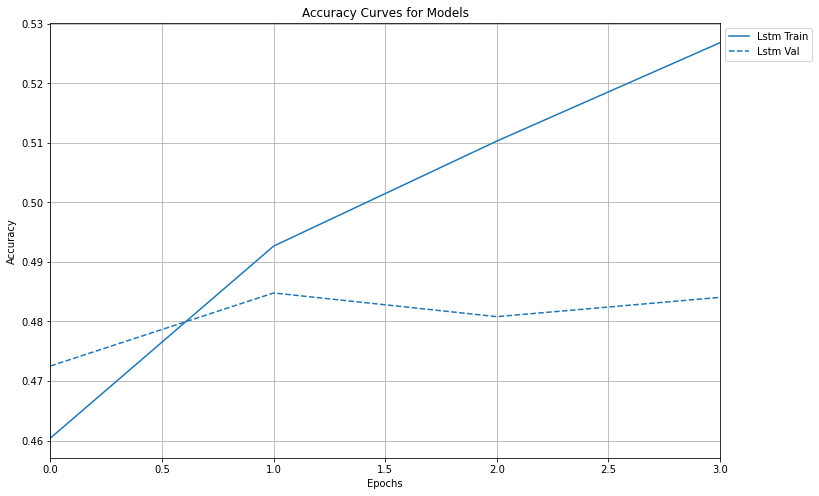

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy')
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Accuracy Curves for Models")
plt.show()

##### Loss Plot using TensorFlow Hub:

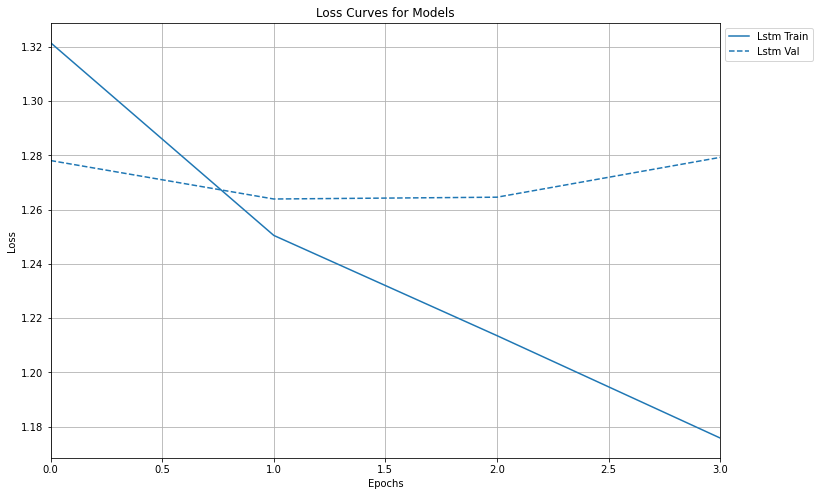

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss')
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Loss Curves for Models")
plt.show()

##### Cohen's Kappa Score:

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
cohen_kappa_score(y_test, y_pred)

0.21827305341914038

##### Matthew's correlation coefficient:

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
matthews_corrcoef(y_test, y_pred)

0.22903591598992762

##### Classification Report:

In [ ]:
def conf_matrix(y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (7,7))
  sns.heatmap(cm,cmap= "Blues", 
              linecolor = 'black', 
              linewidth = 1, 
              annot = True, 
              fmt='', 
              xticklabels = ['Curious to dive deeper', 'Happy', 'Neutral', 'Suprised','Disgusted','Sad','Fearful','Angry'], 
              yticklabels = ['Curious to dive deeper', 'Happy', 'Neutral', 'Suprised','Disgusted','Sad','Fearful','Angry'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.52      0.77      0.62      8075
           2       0.00      0.00      0.00       153
           3       0.00      0.00      0.00       100
           4       0.40      0.23      0.29      2968
           5       0.42      0.34      0.38      4234
           6       0.29      0.12      0.17       232
           7       0.42      0.25      0.31      2989

    accuracy                           0.48     18835
   macro avg       0.26      0.21      0.22     18835
weighted avg       0.45      0.48      0.45     18835



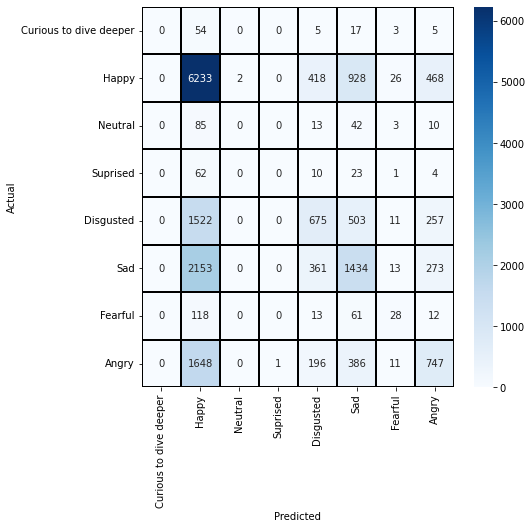

In [ ]:
print(classification_report(y_test,y_pred))
conf_matrix(y_pred)

In [ ]:
# Performance metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
# Add performance parameters to list
perform_list = []
perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

]))

In [ ]:
perform_list

[{'F1': 0.48,
  'Model': 'LSTM',
  'Precision': 0.48,
  'Recall': 0.48,
  'Test Accuracy': 48.4}]

##### TensorFlow Board:

In [ ]:
%load_ext tensorboard

%tensorboard --logdir {logdir}

<IPython.core.display.Javascript object>

## Undersampling of the dataset:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP Project/topical_chat.csv")
df.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


In [ ]:
df["sentiment"].value_counts()

 Curious to dive deeper    80888
 Neutral                   41367
 Surprised                 30638
 Happy                     29617
 Sad                        2533
 Disgusted                  1433
 Fearful                    1026
 Angry                       876
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


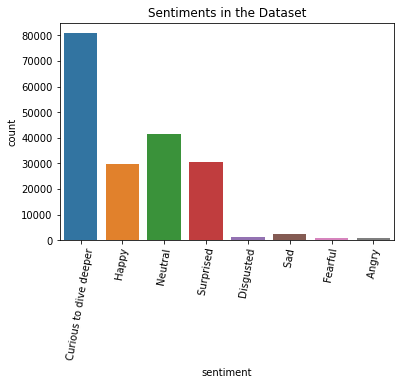

In [ ]:
plt.title("Sentiments in the Dataset")
sns.countplot("sentiment", data = df)
plt.xticks(rotation = 80)
plt.show()

We can see that we have a dataset which contains a column called as Sentiments. We have many sentiments like "Happy", "Natural", "Surprised", "Disgusted" etc. But we can see that there are many conversations which are labelled as "Curious to Dive Deeper".

We need to go further and investigate it more.

In [ ]:
df.isna().sum()

conversation_id    0
message            0
sentiment          0
dtype: int64

In [ ]:
df.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


In [ ]:
df1 = df.copy()

In [ ]:
df1['sentiment'] = df1['sentiment'].astype('category')

In [ ]:
df1['Label'] = df1['sentiment'].cat.codes

In [ ]:
#label = {'sentiment':{'Curious to dive deeper' : 1, 'Happy':2, 'Neutral':3 , 'Suprised':4,'Disgusted':5,'Sad':6, 'Fearful':7, 'Angry':8}}

In [ ]:
df1['Label'].value_counts()

1    80888
5    41367
7    30638
4    29617
6     2533
2     1433
3     1026
0      876
Name: Label, dtype: int64

In [ ]:
df1['Label'].sum()

641799

In [ ]:
df1.head()

,conversation_id,message,sentiment,Label
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper,1
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper,1
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper,1
3,1,Google provides online related services and p...,Curious to dive deeper,1
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper,1


In [ ]:
print("The original shape: ",df.shape)
df1.drop_duplicates(inplace=True)
print("After droping duplicates:",df1.shape)

The original shape:  (188378, 3)
After droping duplicates: (188348, 4)


In [ ]:
# Get Independent Features:
X = df1.drop('Label', axis = 1)
# Get Dependent Features: 
y = df1['Label']

In [ ]:
Messages = X.copy()
Messages.reset_index(inplace=True)

In [ ]:
Messages.shape

(188348, 4)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
ls = LancasterStemmer()
wordNet = WordNetLemmatizer()

In [ ]:
corpus = []
for i in range(len(Messages)):
  record = re.sub("[^a-zA-Z]"," ",Messages['message'][i])
  record = record.lower()
  record = record.split()
  record = [wordNet.lemmatize(word) for word in record if not word in stopwords.words('english')]
  record = ' '.join(record)
  corpus.append(record)

In [ ]:
corpus

['fan google microsoft',
 'excellent technology helpful many way security purpose super',
 'huge fan google use lot think monopoly sense',
 'google provides online related service product includes online ad search engine cloud computing',
 'yeah service good fan intrusive personal life',
 'google leading alphabet subsidiary continue umbrella company alphabet internet interest',
 'know google hundred live goat cut grass past',
 'interesting google provide chrome o light weight o google provided lot hardware mainly',
 'like google chrome use well browser',
 'yes google biggest search engine google service figure top website including youtube blogger',
 'way like fish',
 'yes form sister group tourniquet make sea water clean remove dust fish biggest part eco system',
 'know seahorse fish neck',
 'freshwater fish drink water skin via osmosis saltwater fish drink water mouth dolphin friendly human being',
 'interesting also gill know jellyfish immortal',
 'yes fish important resource human 

In [ ]:
newX = []
for i in corpus:
  newX.append(i)
newX

['fan google microsoft',
 'excellent technology helpful many way security purpose super',
 'huge fan google use lot think monopoly sense',
 'google provides online related service product includes online ad search engine cloud computing',
 'yeah service good fan intrusive personal life',
 'google leading alphabet subsidiary continue umbrella company alphabet internet interest',
 'know google hundred live goat cut grass past',
 'interesting google provide chrome o light weight o google provided lot hardware mainly',
 'like google chrome use well browser',
 'yes google biggest search engine google service figure top website including youtube blogger',
 'way like fish',
 'yes form sister group tourniquet make sea water clean remove dust fish biggest part eco system',
 'know seahorse fish neck',
 'freshwater fish drink water skin via osmosis saltwater fish drink water mouth dolphin friendly human being',
 'interesting also gill know jellyfish immortal',
 'yes fish important resource human 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(newX)

vector = vectorizer.transform(newX)
type(vector)

scipy.sparse.csr.csr_matrix

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

RanUnder = RandomUnderSampler()
X1,y1 = RanUnder.fit_resample(vector,y)

In [ ]:
counter = Counter(y1)
print(counter)

Counter({0: 876, 1: 876, 2: 876, 3: 876, 4: 876, 5: 876, 6: 876, 7: 876})


In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
# Vocabulary Size:
voc_size = 5000

In [ ]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[195, 2893, 583],
 [372, 1579, 1368, 1793, 4700, 1234, 152, 1777],
 [1633, 195, 2893, 954, 401, 3327, 917, 3690],
 [2893, 907, 4587, 4702, 2493, 2603, 952, 4587, 981, 4543, 1687, 4138, 4791],
 [2404, 2493, 3698, 195, 1546, 3406, 1395],
 [2893, 4525, 3824, 3597, 4909, 4663, 2647, 3824, 2659, 4680],
 [4697, 2893, 487, 813, 2812, 889, 3909, 3971],
 [355, 2893, 4655, 4691, 1815, 4759, 1268, 1815, 2893, 1640, 401, 3967, 4483],
 [582, 2893, 4691, 954, 1142, 2184],
 [2137, 2893, 389, 4543, 1687, 2893, 2493, 4798, 1153, 2399, 2752, 4903, 4806],
 [4700, 582, 2865],
 [2137,
  1108,
  1501,
  4664,
  4814,
  3830,
  4040,
  4373,
  3564,
  400,
  941,
  2865,
  389,
  493,
  3152,
  3478],
 [4697, 3699, 2865, 1364],
 [1495,
  2865,
  225,
  4373,
  1444,
  1915,
  2983,
  2820,
  2865,
  225,
  4373,
  2433,
  244,
  497,
  426,
  3301],
 [355, 4788, 2810, 4697, 1322, 3854],
 [2137,
  2865,
  2304,
  4016,
  426,
  3435,
  3285,
  4830,
  3222,
  2865,
  195,
  2865,
  2267,
  1686],
 [655, 582,

In [ ]:
from tensorflow.keras.layers import Embedding
from sklearn.metrics import accuracy_score
from keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, CuDNNGRU

In [ ]:
## Embedding Representation:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ...  195 2893  583]
 [   0    0    0 ... 1234  152 1777]
 [   0    0    0 ... 3327  917 3690]
 ...
 [   0    0    0 ... 3910 1448 1687]
 [   0    0    0 ... 4557  108  833]
 [   0    0    0 ...  160 4818 1603]]


In [ ]:
embedded_docs.shape

(188348, 20)

In [ ]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final,y_final, test_size = 0.1, random_state=42 )

In [ ]:
embedding_vector_features = 200 
def train_and_evaluate_model(model_name, X_test, trainable=False):
  if(model_name == 'LSTM'):
    #hub_layer = hub.kerasLayer(model_name, dtype=tf.string,  trainable=trainable)
    model = Sequential()
    model.add(Embedding(voc_size,embedding_vector_features, input_length = sent_length))
    model.add(Dropout(0.3))  
    model.add(CuDNNLSTM(200, return_sequences=True,)) # 60 Neurons
    model.add(CuDNNLSTM(200))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'softmax', kernel_initializer = 'glorot_uniform'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 64,
                        callbacks = [tfdocs.modeling.EpochDots(),
                                     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,
                                                                      mode = 'min'),
                                     tf.keras.callbacks.TensorBoard(logdir/model_name)],
                        verbose = 0)
    y_pred = np.argmax(model.predict(X_test), axis = -1)

  elif(model_name == 'Bi-LSTM'):
    #hub_layer = hub.kerasLayer(model_name, dtype=tf.string,  trainable=trainable)
    model = Sequential()
    model.add(Embedding(voc_size,embedding_vector_features, input_length = sent_length))
    model.add(Dropout(0.3))  
    model.add(Bidirectional(CuDNNLSTM(200, return_sequences=True,))) # 60 Neurons
    model.add(Bidirectional(CuDNNLSTM(200)))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'softmax', kernel_initializer = 'glorot_uniform'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 64,
                        callbacks = [tfdocs.modeling.EpochDots(),
                                     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,
                                                                      mode = 'min'),
                                     tf.keras.callbacks.TensorBoard(logdir/model_name)],
                        verbose = 0)
    y_pred = np.argmax(model.predict(X_test), axis = -1)
  
  elif(model_name == 'GRU'):
    #hub_layer = hub.kerasLayer(model_name, dtype=tf.string,  trainable=trainable)
    model = Sequential()
    model.add(Embedding(voc_size,embedding_vector_features, input_length = sent_length))
    model.add(Dropout(0.3))  
    model.add(CuDNNGRU(200, return_sequences=True,)) # 60 Neurons
    model.add(CuDNNGRU(200))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'softmax', kernel_initializer = 'glorot_uniform'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 64,
                        callbacks = [tfdocs.modeling.EpochDots(),
                                     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,
                                                                      mode = 'min'),
                                     tf.keras.callbacks.TensorBoard(logdir/model_name)],
                        verbose = 0)
    y_pred = np.argmax(model.predict(X_test), axis = -1)

  elif(model_name == 'Bi-GRU'):
    #hub_layer = hub.kerasLayer(model_name, dtype=tf.string,  trainable=trainable)
    model = Sequential()
    model.add(Embedding(voc_size,embedding_vector_features, input_length = sent_length))
    model.add(Dropout(0.3))  
    model.add(Bidirectional(CuDNNGRU(200, return_sequences=True,))) # 60 Neurons
    model.add(Bidirectional(CuDNNGRU(200)))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'softmax', kernel_initializer = 'glorot_uniform'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 64,
                        callbacks = [tfdocs.modeling.EpochDots(),
                                     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,
                                                                      mode = 'min'),
                                     tf.keras.callbacks.TensorBoard(logdir/model_name)],
                        verbose = 0)
    y_pred = np.argmax(model.predict(X_test), axis = -1)
    
  return history, y_pred

In [ ]:
# We should be cognizant to save the history objects.
histories = {}

In [ ]:
model_name = input("Please enter the model name: ")
histories[model_name], y_pred = train_and_evaluate_model(model_name, X_test, trainable=False)

Please enter the model name: LSTM
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 200)           1000000   
                                                                 
 dropout_4 (Dropout)         (None, 20, 200)           0         
                                                                 
 cu_dnnlstm_4 (CuDNNLSTM)    (None, 20, 200)           321600    
                                                                 
 cu_dnnlstm_5 (CuDNNLSTM)    (None, 200)               321600    
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 1608      
                                                                 
Total params: 1,644,

#### Performance Metrics and Analysis:

##### Classification Report:

In [ ]:
def conf_matrix(y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (7,7))
  sns.heatmap(cm,cmap= "Blues", 
              linecolor = 'black', 
              linewidth = 1, 
              annot = True, 
              fmt='', 
              xticklabels = ['Curious to dive deeper', 'Happy', 'Neutral', 'Suprised','Disgusted','Sad','Fearful','Angry'], 
              yticklabels = ['Curious to dive deeper', 'Happy', 'Neutral', 'Suprised','Disgusted','Sad','Fearful','Angry'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.50      0.01      0.02        84
           1       0.53      0.72      0.61      8075
           2       0.10      0.01      0.01       153
           3       0.36      0.04      0.07       100
           4       0.41      0.25      0.31      2968
           5       0.42      0.33      0.37      4234
           6       0.20      0.15      0.17       232
           7       0.39      0.33      0.35      2989

    accuracy                           0.48     18835
   macro avg       0.37      0.23      0.24     18835
weighted avg       0.46      0.48      0.45     18835



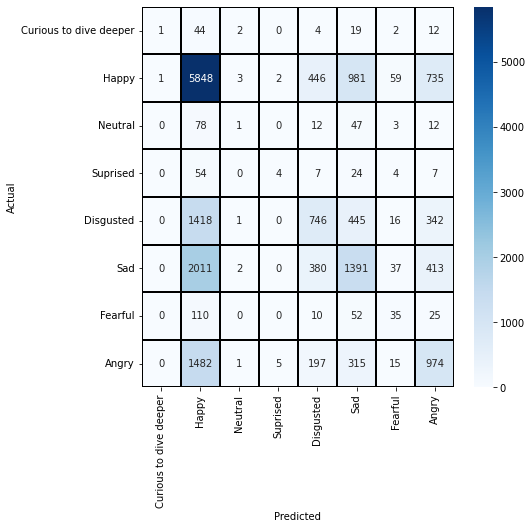

In [ ]:
print(classification_report(y_test,y_pred))
conf_matrix(y_pred)

In [ ]:
# Performance metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
# Add performance parameters to list
perform_list = []
perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

]))

In [ ]:
perform_list

[{'F1': 0.48,
  'Model': 'LSTM',
  'Precision': 0.48,
  'Recall': 0.48,
  'Test Accuracy': 48.4}]

##### Accuracy Plot using TensorFlow Hub:

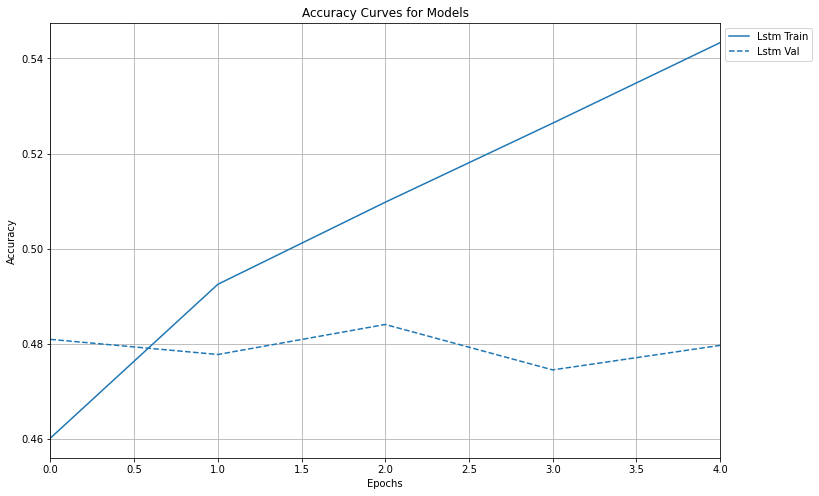

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy')
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Accuracy Curves for Models")
plt.show()

##### Loss Plot using TensorFlow Hub:

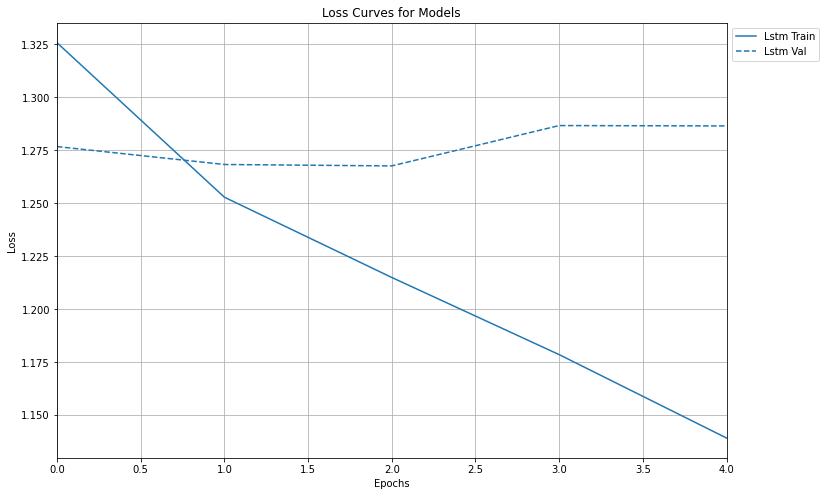

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss')
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Loss Curves for Models")
plt.show()

##### Cohen's Kappa Score:

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
cohen_kappa_score(y_test, y_pred)

0.21827305341914038

##### Matthew's correlation coefficient:

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
matthews_corrcoef(y_test, y_pred)

0.22903591598992762

##### ROC-AUC Curve:

##### TensorFlow Board:

In [ ]:
%load_ext tensorboard

%tensorboard --logdir {logdir}

## GANs (Generative Adversarial Networks) in NLP: